# Results v2:

## General Hyperparameters:

- Dataset: MNIST (scaled down to 7x7)
- Model: 2-layer MLP (49-32-ReLU-10)
- Training batch size: 32
- Optimizer: SGD
- Learning rate: 0.001
- Epochs: 5

## GGN Hyperparameters:
- GGN batch sizes: $[2^i]_{i=0}^{12}$
- GGN computations after $n$ training steps: $n \in \{0, 4000, 8000\}$
- GGN samples per computation iteration: 8

In [5]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

In [16]:
results_path = "../results_v2/"
min_exp = 0
max_exp = 12
n_samples = 8
ggn_iteration_freq = 4000
num_ggn_iterations = 3

In [17]:
iterations = [ggn_iteration_freq * x for x in range(0, num_ggn_iterations)]
batch_sizes = [2**x for x in range(min_exp, max_exp + 1)]

GGN_batched = {}
GGN_total = {}

for iters in iterations:
    GGN_batched[iters] = []
    for batch_size in batch_sizes:
        GGN_batched[iters].append(np.load(str(Path(results_path, f"GGN_{batch_size}_batched_{iters}.npy"))))
    GGN_total[iters] = np.load(str(Path(results_path, f"GGN_total_{iters}.npy")))

In [18]:
frobenius_distances = np.empty((num_ggn_iterations, len(batch_sizes), n_samples))

for iters_idx, iters in enumerate(iterations):
    for batch_size_idx in range(len(batch_sizes)):
        for sample_idx in range(n_samples):
            frobenius_distances[iters_idx, batch_size_idx, sample_idx] = np.linalg.norm(GGN_total[iters] - GGN_batched[iters][batch_size_idx][sample_idx])

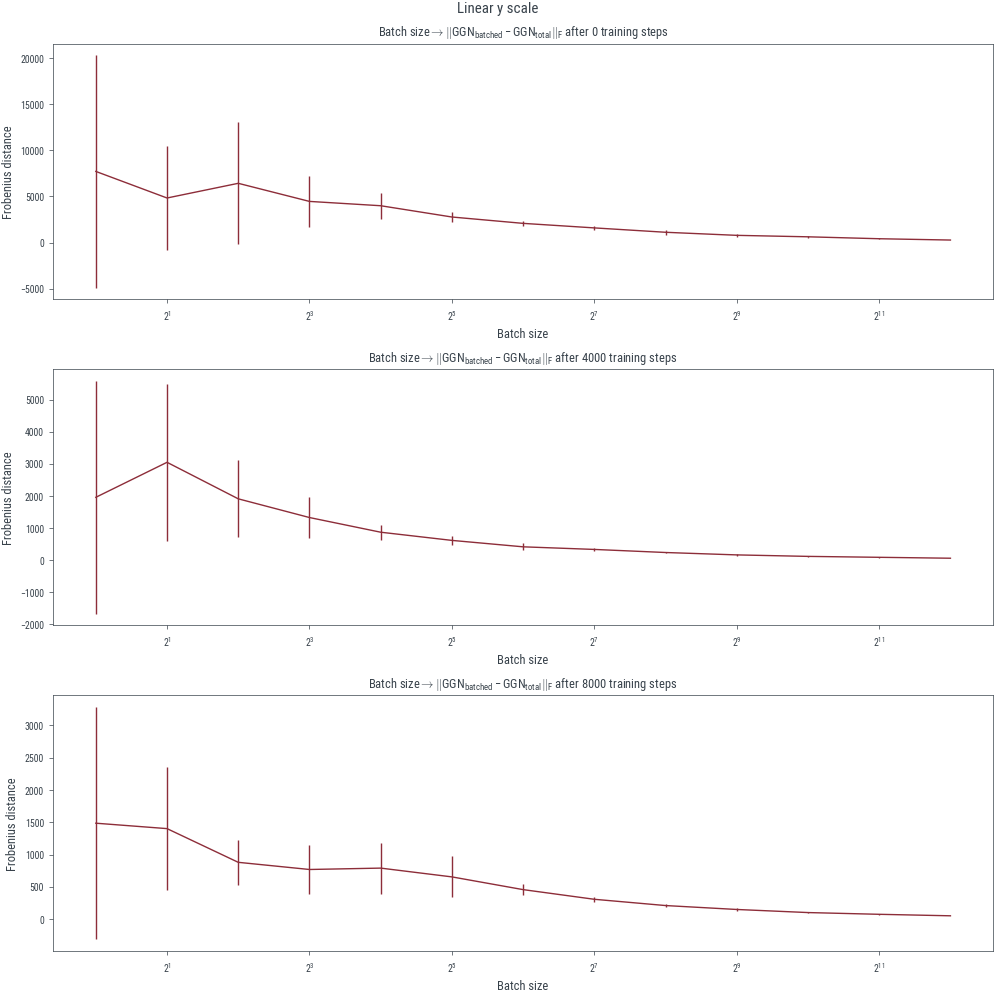

In [29]:
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))
fig.suptitle("Linear y scale")

for iters_idx, iters in enumerate(iterations):
    axs[iters_idx].errorbar(batch_sizes, frobenius_distances[iters_idx].mean(axis=1), frobenius_distances[iters_idx].std(axis=1, ddof=1))
    axs[iters_idx].set_title("$\\text{Batch size} \\to \|\\text{GGN}_{\\text{batched}} - \\text{GGN}_{\\text{total}}\|_F$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("Batch size")
    axs[iters_idx].set_ylabel("Frobenius distance");

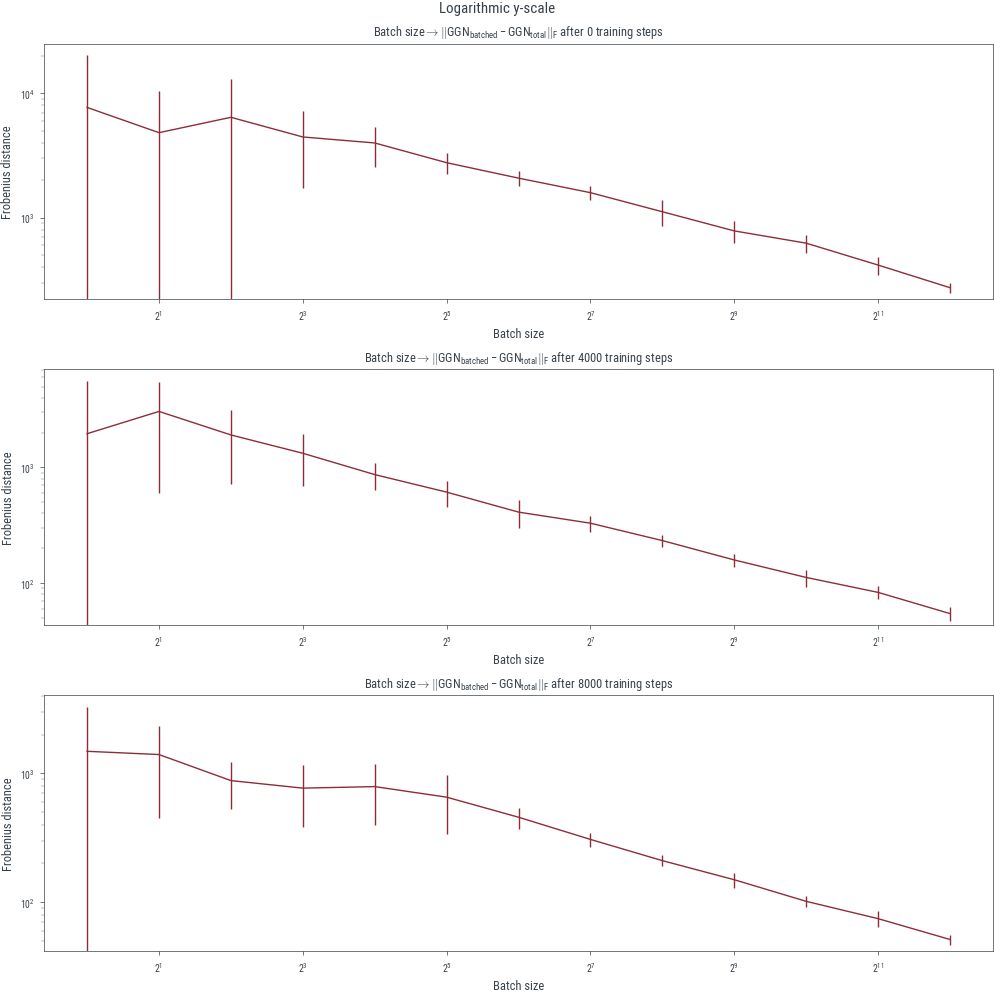

In [28]:
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))
fig.suptitle("Logarithmic y-scale")

for iters_idx, iters in enumerate(iterations):
    axs[iters_idx].errorbar(batch_sizes, frobenius_distances[iters_idx].mean(axis=1), frobenius_distances[iters_idx].std(axis=1, ddof=1))
    axs[iters_idx].set_title("$\\text{Batch size} \\to \|\\text{GGN}_{\\text{batched}} - \\text{GGN}_{\\text{total}}\|_F$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_yscale('log')
    axs[iters_idx].set_xlabel("Batch size")
    axs[iters_idx].set_ylabel("Frobenius distance");